In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv("data/train.csv")  
test = pd.read_csv("data/test.csv")
# train和test都是表格型数据Dataframe
sample_submission = pd.read_csv("data/sample_submission.csv")


print(train.shape)
print(test.shape)
train.head(10)   # 查看前五行数据(默认参数是5)


(1460, 81)
(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


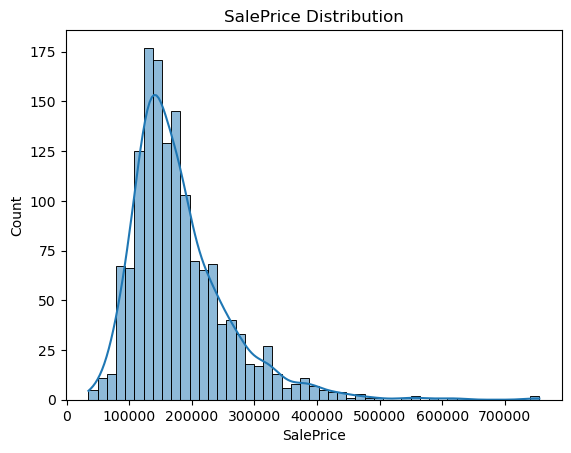

In [72]:
sns.histplot(train["SalePrice"], kde=True)
# 取出训练数据的一列，绘制直方图
# 默认stat=count，也就是每个柱子的样本数
# kde=True表示额外叠加一条核密度曲线，用一条平滑曲线表现分布趋势
plt.title("SalePrice Distribution")
plt.show()

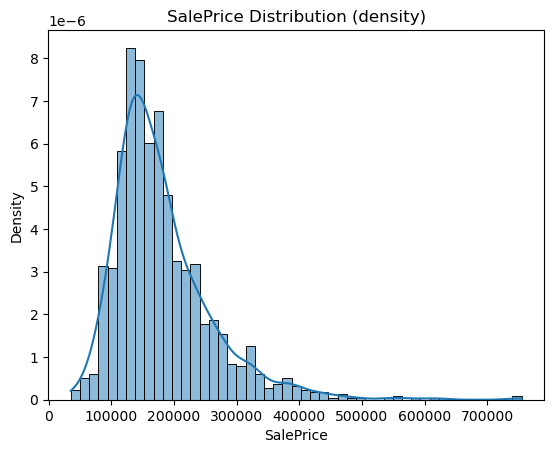

In [73]:
sns.histplot(train["SalePrice"], kde=True, stat="density")
# density表示纵轴的连续密度，柱子的面积积分为1
plt.title("SalePrice Distribution (density)")
plt.show()

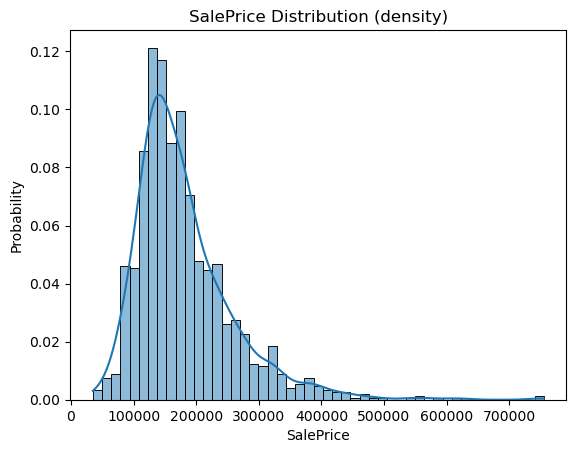

In [74]:
sns.histplot(train["SalePrice"], kde=True, stat="probability")
# probability表示样本占比，柱子高度和为1
plt.title("SalePrice Distribution (density)")
plt.show()

探索——查看房屋面积和售价的关系

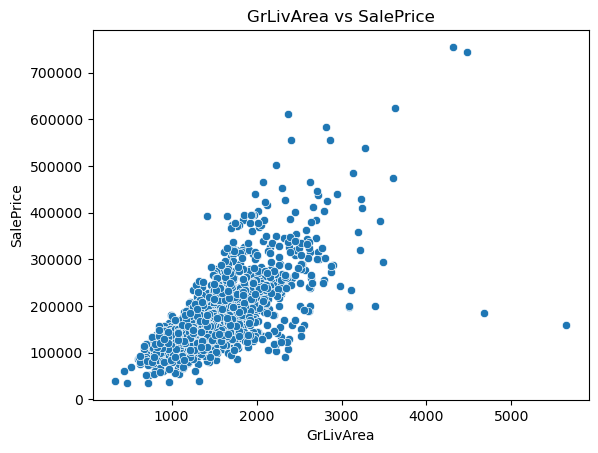

In [75]:
sns.scatterplot(x=train["GrLivArea"], y=train["SalePrice"])
plt.title("GrLivArea vs SalePrice")
plt.show()


探索——查看离散性特征房屋整体质量评分和售价的关系

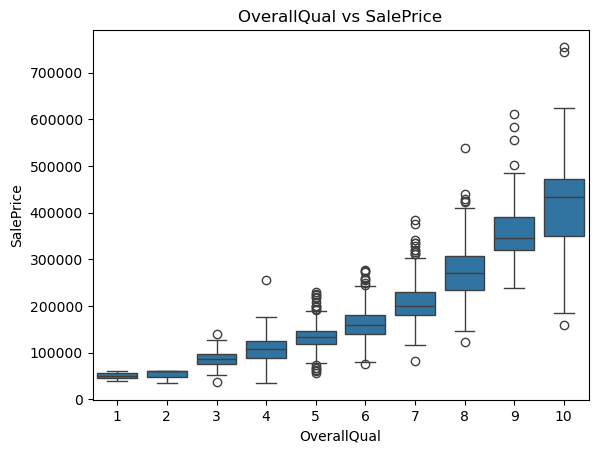

In [76]:
sns.boxplot(x=train["OverallQual"], y=train["SalePrice"])
plt.title("OverallQual vs SalePrice")
plt.show()


计算相关系数矩阵

In [77]:
# 只选数值型列来做相关性
# 在train里挑出数值型的列
num_cols = train.select_dtypes(include='number')
# select_dtypes(include='number') 会返回只含数值列的 DataFrame
print(num_cols.head(1))
num_cols = num_cols.columns
# .columns 再取出这些列名，得到一个列名列表（Index）
print(num_cols)


corr_matrix = train[num_cols].corr() 
# 用列名列表从train中取出子表
# .corr()表示对子表中的每两列都计算一次Pearson相关系数
# corr_matrix是一个对称的方阵

# 挑出与 SalePrice 相关性最高的前 10 个特征
top_corr = corr_matrix["SalePrice"].sort_values(ascending=False).head(10)
# 从相关系数方阵里，取出“与 SalePrice 的相关性”这一整列
# .sort_values(ascending=False)降序排序
print(top_corr)



   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   

   SalePrice  
0     208500  

[1 rows x 38 columns]
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorc

相关性可视化


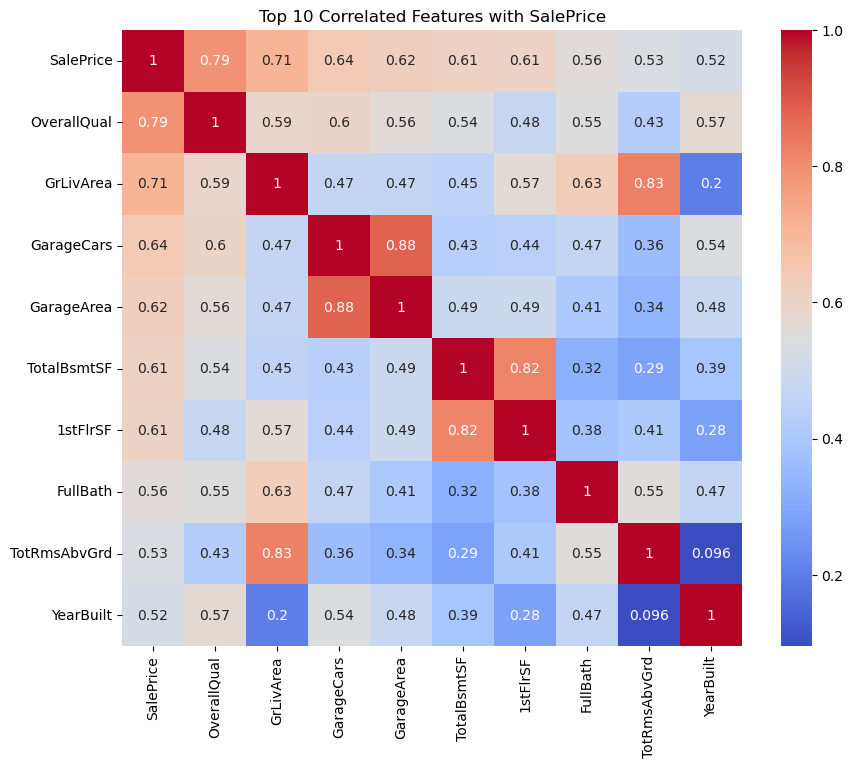

In [78]:
# 选出和 SalePrice 相关性最高的前 10 个特征
top_features = corr_matrix["SalePrice"].abs().sort_values(ascending=False).head(10).index
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix.loc[top_features, top_features], annot=True, cmap="coolwarm")
plt.title("Top 10 Correlated Features with SalePrice")
plt.show()